# <center><font color="red" style = "verdana">Loan Prediction</font></center>

<center><img src="https://media.istockphoto.com/illustrations/loan-word-cloud-concept-5-illustration-id660489232" height=500 /></center>

### 1. Problem Statement

>A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.



### 2. Hypothesis Generation

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem)

 * Salary: Applicants with high income should have more chances of loan approval.
 * Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
 * Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
 * Loan term: Loan for less time period and less amount should have higher chances of approval.
 * EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

### 3. Data Loading and Description

In [147]:
#importing the Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings   # To ignore any warnings
warnings.filterwarnings("ignore")

print("Setup Complete")


Setup Complete


#### 2.1  Loading the data files 

In [148]:
# Reading the training dataset using Pandas
train = pd.read_csv("train.csv")

# Reading the testing dataset using Pandas
test = pd.read_csv("test.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [149]:
# Copying the dataset so that we won't lose the original dataset
train_original = train.copy()
test_original = test.copy()

#### 2.2 Variable Description

Lets describe whats the meaning of the features given the train and test datasets.

#### Variable Definition Key.




|       Variable      |                   Description                  |
|:-------------------:|:----------------------------------------------:|
|      `Loan_ID`      |                 Unique Loan ID                 |
|       `Gender`      |                  Male/ Female                  |
|      `Married`      |             Applicant married (Y/N)            |
|     `Dependents`    |              Number of dependents              |
|     `Education`     | Applicant Education (Graduate/ Under Graduate) |
|   `Self_Employed`   |               Self employed (Y/N)              |
|  `ApplicantIncome`  |                Applicant income                |
| `CoapplicantIncome` |               Coapplicant income               |
|     `LoanAmount`    |           Loan amount (in thousands)           |
|  `Loan_Amount_Term` |             Term of loan in months             |
|   `Credit_History`  |         Credit history meets guidelines        |
|   `Property_Area`   |            Urban/ Semi Urban/ Rural            |
|    `Loan_Status`    |               Loan approved (Y/N)              |

In [150]:
# Printing the shape of train dataset
print('Train Dataset contain: ', train.shape)

Train Dataset contain:  (614, 13)


In [151]:
#Printing the shape of size dataset
print('Test Dataset contain: ', test.shape)

Test Dataset contain:  (367, 12)


>**Note:** In the above train and test dataset columns `Loan_Status` is missing in the test columns which is considered as the **Target Column**.

***Variable Identification***

First , identifying **Predictor** (Input) and **Target** (Output) variables. Next, identify the data type and category of the variables.

In [152]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
# Remove row with missing target, separate target from predictors
train.dropna(subset=["Loan_Status"], axis=0, inplace = True)

# Select Target Variable
y = train.Loan_Status

# Select Predictor Variable
X = train.drop(["Loan_Status"], axis = 1)

In [154]:
# Select categorical columns
categorical_col = [cname for cname in X.columns if X[cname].nunique()<10 and X[cname].dtype == 'object']

# Select numerical columns
numerical_col = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

print('Categorical columns: ',categorical_col)
print('\nNumerical columns: ',numerical_col)

Categorical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

Numerical columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### **4. Exploratory Data Analysis**

#### 4.1 ***Univariate Analysis***

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.


In [155]:
# We will look at the target variable i.e. "Loan_Status"
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [156]:
# Normalizing it to True to print the proportion instead of number
train["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

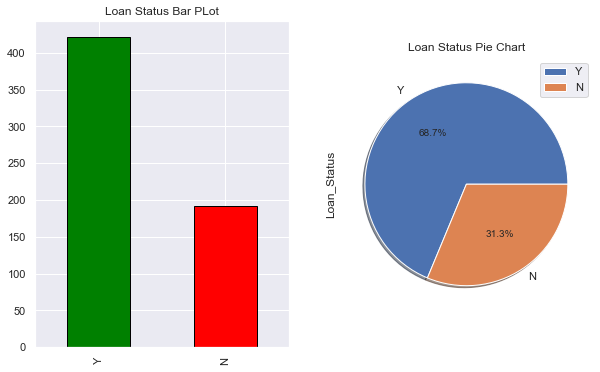

In [157]:
# Lets visualize the target variable
#%matplotlib inline
# train["Loan_Status"].value_counts().plot(kind = 'pie')
#train["Loan_Status"].value_counts().plot(kind = 'bar')


plt.figure(1)

plt.subplot(121)
train["Loan_Status"].value_counts().plot(kind = 'bar', figsize = (10,6),
                                                     edgecolor = 'black',
                                                     color = ['green', 'red'],
                                                     title='Loan Status Bar PLot' )

plt.subplot(122)
train["Loan_Status"].value_counts().plot(kind = 'pie', figsize = (10,6), 
                                                         autopct = '%1.1f%%', 
                                                        shadow = True, 
                                                         title='Loan Status Pie Chart')

plt.legend()

plt.show()

> The distribution of `Loan_Status` shows that loan of 422 (around 69%) people out of 614 was approved.
    

##### Categorical Variable
It contains catergories (Gender, Married, Self_Employed, Credit_History)
      

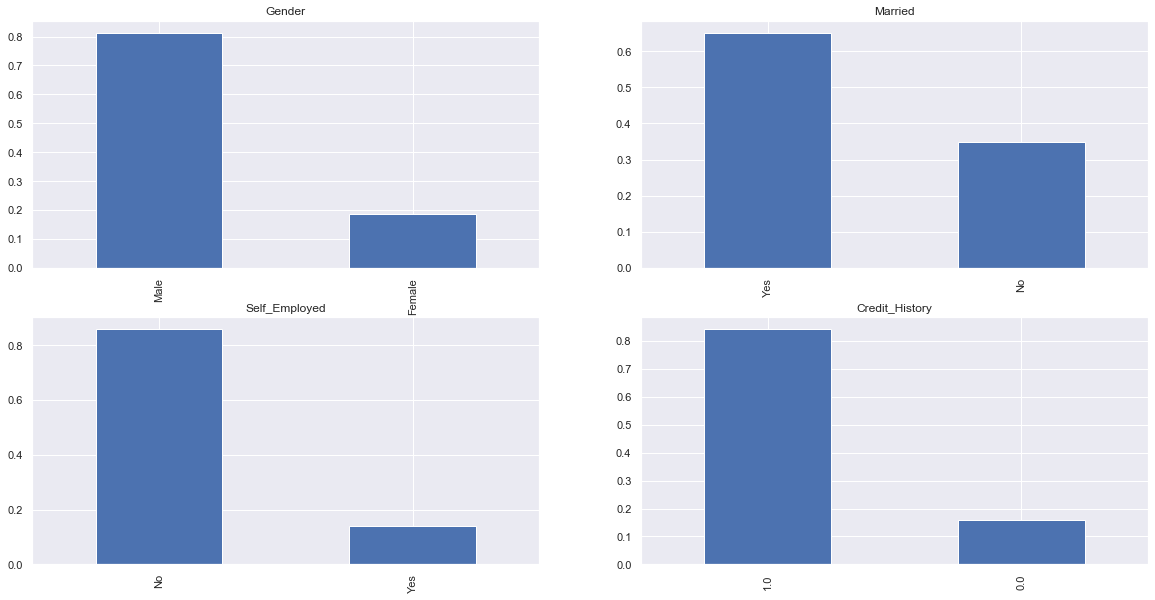

In [158]:
plt.figure(1) 



plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

plt.show()



It can be inferred from the above bar plots that:
   * 80% of the applicants are males.
   * Around 65% of the applicants in the dataset are married.
   * Around 15% of the applicants are self-employed.
   * Around 85% of the applicants have repaired the debts.

#### Ordinal Variable
   Variables in categorical features having some order involved (`Dependents`, `Education`, `Property_Area`)

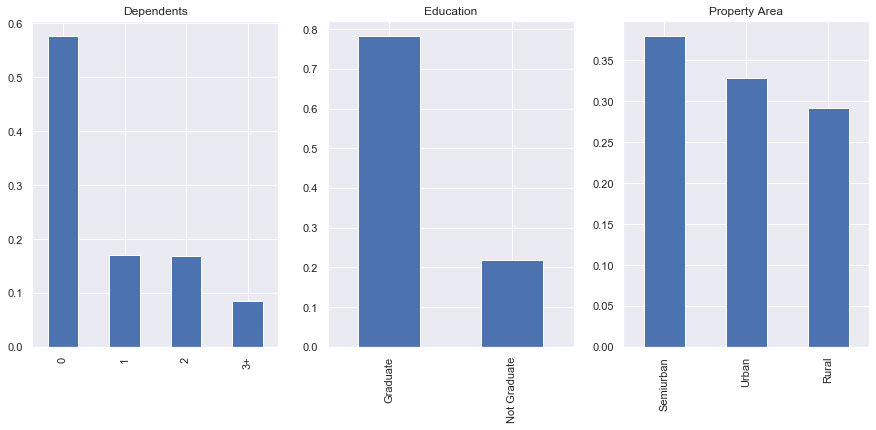

In [159]:
plt.figure(1)

sns.set(style = 'darkgrid')


plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot(kind = 'bar', figsize = (15,6), title= 'Dependents')

plt.subplot(132)
train["Education"].value_counts(normalize = True).plot(kind = 'bar', title = 'Education')

plt.subplot(133)
train["Property_Area"].value_counts(normalize = True).plot(kind='bar', title = "Property Area")

plt.show()

Following interferences can be made from the above plots
   * Most of the applicants don't have dependents.
   * Around 80% of the applicants are Graduate.
   * Most of the applicants are from Semi-Urban

##### Numerical Variable

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variable (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`)

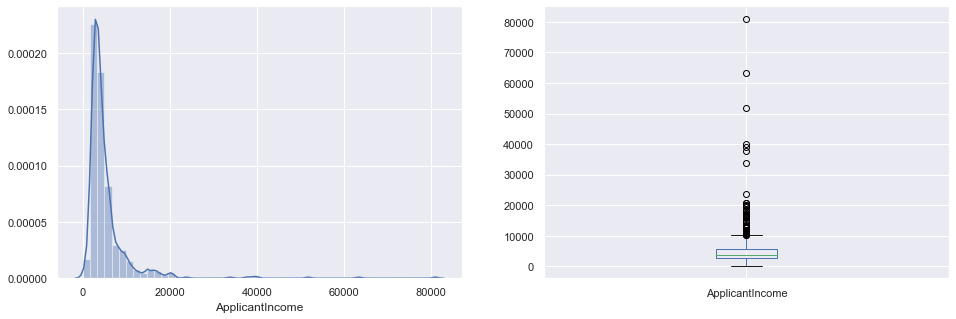

In [160]:
# Lets looks at distribution plot of Applicant Income


plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot(kind='box', figsize = (16,5))

plt.show()

It can inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. 

The boxplot confirm the presence of outliers/extreme values. This can be attributed to income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5, 0.98, '')

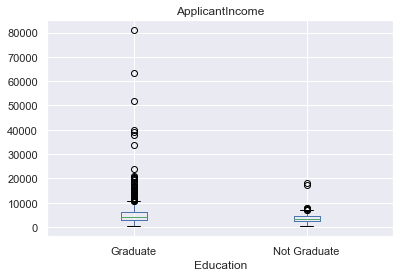

In [161]:
# Creating the Applicant Income by considering Education levels
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("") # Add centre title to the figure

We can see that there high number graduate with very high income, which are appearing the outliers.

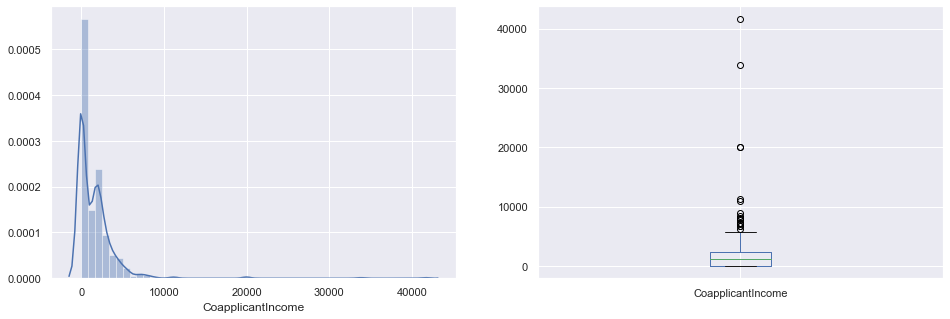

In [162]:
# Let's look at the Coapplicant income distribution
plt.figure(1)

plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(122)
train['CoapplicantIncome'].plot(kind = 'box', figsize = (16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant's income range from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

In [163]:
# Let's see if there is any null value in column

print('Total number of null values is LoanAmount columns: ', end='')
print(train['LoanAmount'].isna().sum())

train_d_nan = train.dropna()
print('After removing null values from dataset: ', end='')
print(train_d_nan['LoanAmount'].isna().sum())


Total number of null values is LoanAmount columns: 22
After removing null values from dataset: 0


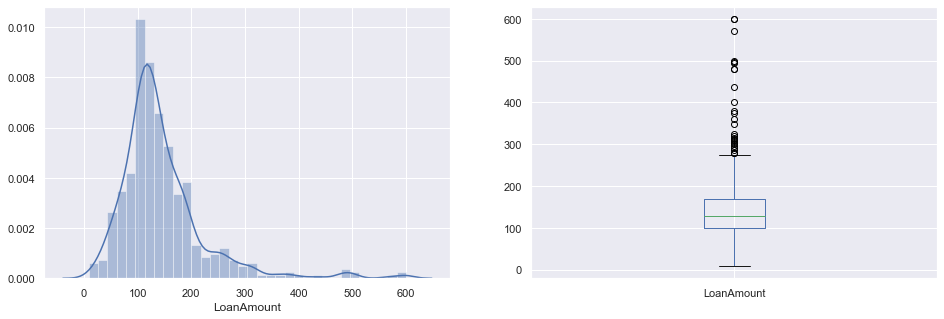

In [164]:
# Lets see the distribution of LoanAmount

plt.figure(1)


plt.subplot(121)
sns.distplot(train_d_nan['LoanAmount'])

plt.subplot(122)
train_d_nan['LoanAmount'].plot(kind = 'box', figsize = (16, 5))

plt.show()

#### 4.1 ***Bivariate Analysis***

After looking at each variable individual in univariate analysis, we will now explore them again with respect to the target variable.

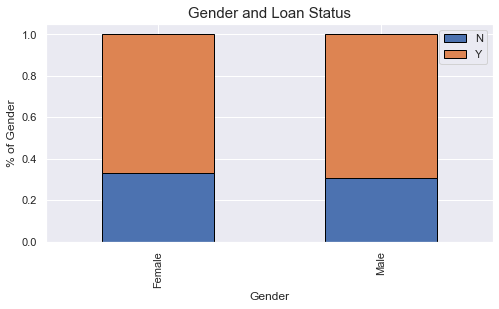

In [165]:
# Let's visualize Gender and Loan Status
sns.set(style = 'darkgrid')
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                       stacked = True, 
                                                       edgecolor = 'black',
                                                       label = ['Male', 'Female'],
                                                       figsize = (8,4))
plt.title('Gender and Loan Status', fontsize = 15)
plt.ylabel('% of Gender')
plt.legend()

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

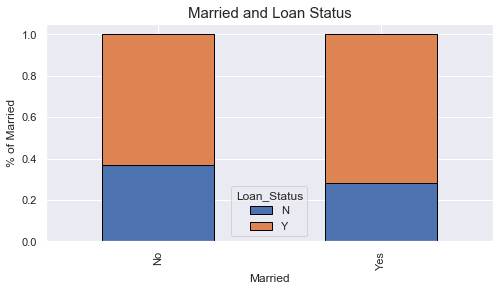

In [166]:
# Let's visualize Married and Loan Status

Married = pd.crosstab(train['Married'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                         stacked = True, 
                                                       edgecolor = 'black',
                                                       label = ['Married', 'Not-Married'],
                                                       figsize = (8,4))
plt.title('Married and Loan Status', fontsize = 15)
plt.ylabel('% of Married')
plt.show()

It can be infered that the proportion of Married applicant is higher for the approved loans that Un-Married applicants.

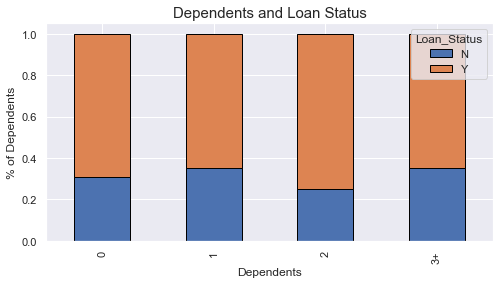

In [167]:
# Lets visualize the Dependents and Loan Status
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, 
                                                       edgecolor = 'black',
                                                       figsize = (8,4))
plt.title('Dependents and Loan Status', fontsize = 15)
plt.ylabel('% of Dependents')
plt.show()


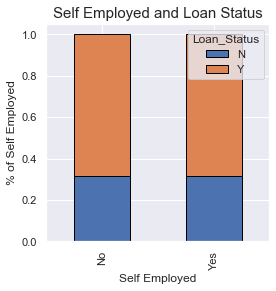

In [168]:
# Lets visualize the Self Employed and Loan Status
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                                     edgecolor = 'black',
                                                                     stacked = True, 
                                                                     figsize = (4,4))

plt.title('Self Employed and Loan Status', fontsize = 15)
plt.ylabel('% of Self Employed')
plt.xlabel('Self Employed')
plt.show()

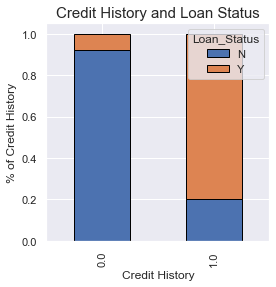

In [169]:
# Let's visualize the Credit History
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                                       edgecolor = 'black',
                                                                       stacked = True, 
                                                                       figsize = (4,4))

plt.title('Credit History and Loan Status', fontsize = 15)
plt.ylabel('% of Credit History')
plt.xlabel('Credit History')
plt.show()

It can inferred that
   * Proportion of married applicants is higher for the approved loans.
   * Distribution of applicants with 1 or 3+ dependents is similar across both the categories of `Loan_Status`.
   * There is nothing significant we can infer from `Self_Employed` vs `Loan_Status` plot.

Text(0.5, 0, 'Income')

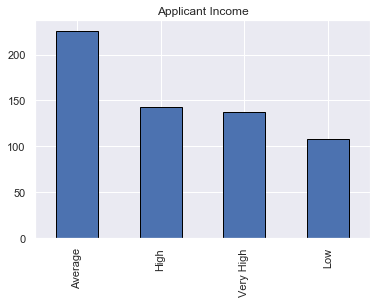

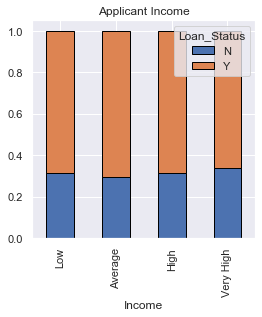

In [170]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)

train['Income_bin'].value_counts().plot(kind = 'bar', title = 'Applicant Income', 
                                                        edgecolor = 'black', figsize =(6,4))

# Lets compare the different group with Loan Status
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                               edgecolor = 'black',
                                                                stacked = True, figsize = (4,4))
plt.title('Applicant Income')
plt.xlabel('Income')


It can be inferred that Applicant Income does not effect the chances of loan approval which is contradicts our hypothesis in wihch we assumed that if the applicant income is high the chances of of loan approval will also be high.

Text(0, 0.5, 'Percentage')

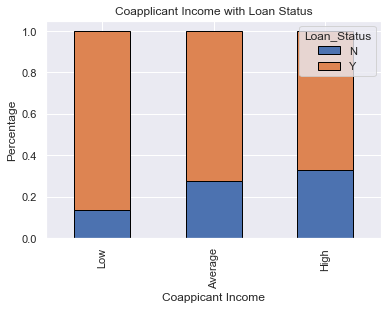

In [171]:
# We will analyze the co-applicant income and loan Status
bins = [0, 1000, 3000, 45000]
group = ['Low', 'Average', 'High']

train['Coapplicant_income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group)

Coapplicant_income_bin = pd.crosstab(train['Coapplicant_income_bin'], train['Loan_Status'])
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                                                       edgecolor = 'black',
                                                                                       stacked = True, 
                                                                                       title = 'Coapplicant Income with Loan Status')
plt.xlabel('Coappicant Income')
plt.ylabel('Percentage')


Text(0.5, 0, 'Total Income')

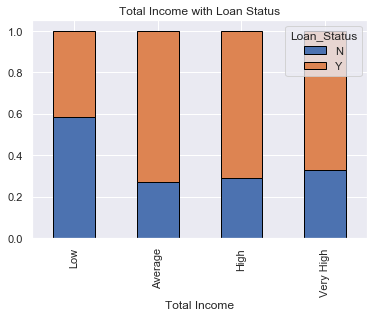

In [172]:
# Lets combine Applicant and Coapplicant Income for analysing
train['Total_Income'] = train['ApplicantIncome'] + train["CoapplicantIncome"]

bins = [0, 2500, 4000, 6000, 81000]
groups = ['Low', 'Average', 'High', 'Very High']

train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = groups)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
P = Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                                               edgecolor = 'black',
                                                                               stacked = True, 
                                                                               title = 'Total Income with Loan Status')
plt.xlabel('Total Income')

We can see that Proportion of loans getting approved for applicants having low `Total_Income` is very less as compared to that of applicants with Average, High and Very High Income.

Text(0.5, 0, 'Loan Amount Bin')

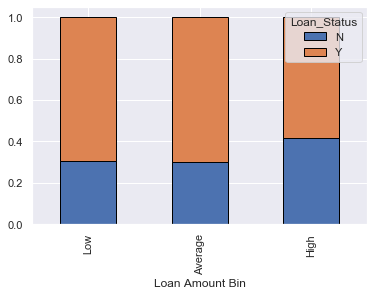

In [173]:
# We will visualize the Loan amount variable
bins = [0, 100, 300, 700]
groups = ['Low', 'Average', 'High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = groups)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                                       edgecolor = 'black',
                                                                       stacked = True)
plt.xlabel('Loan Amount Bin')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

### 4.  Cleaning the data

In [174]:
train=train.drop([ 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

In [175]:
train.dtypes

Loan_ID                     object
Gender                      object
Married                     object
Dependents                  object
Education                   object
Self_Employed               object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area               object
Loan_Status                  int64
Income_bin                category
Coapplicant_income_bin    category
dtype: object

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

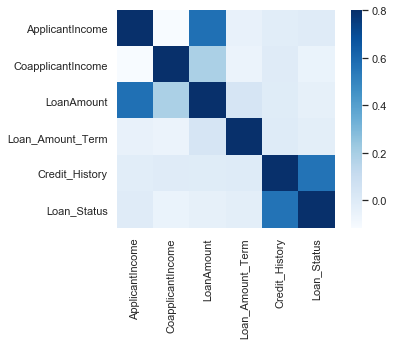

In [176]:
matrix = train.corr()
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = "Blues")

We see that the most correlated variables are (`ApplicantIncome` - `LoanAmount`) and (`Credit_History` - `Loan_Status`). `LoanAmount` is also correlated with `CoapplicantIncome`.

#### 4.1 Missing Value Imputation

In [177]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_income_bin    273
dtype: int64

There are missing values in `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History` features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

 * For numerical variables: imputation using mean or median
 * For categorical variables: imputation using mode

In [178]:
# Filling missing value with mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train["Married"].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)


In [179]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [180]:
# We will replace the missing value with mode of feature i.e. 360
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)


In [181]:
train['Loan_Status'].dtypes

dtype('int64')

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [182]:
# We will replace the numerical variable with median of numerical feature
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [183]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_income_bin    273
dtype: int64

In [184]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [185]:
# Use above approach to fill missing value in Test

test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace = True)


In [186]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### 4.2 Outlier Treatment

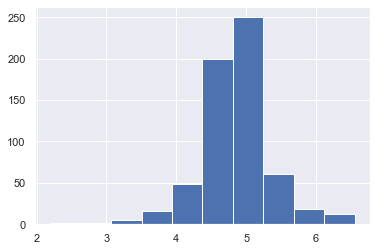

In [187]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist()

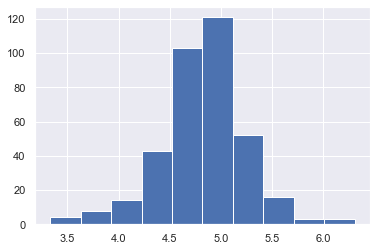

In [188]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist()


In [189]:
train.drop('LoanAmount_log', axis = 1, inplace = True)
train.drop('Income_bin', axis = 1, inplace = True) #dropping Income_bin
train.drop('Coapplicant_income_bin', axis = 1, inplace = True) #dropping Coapplicant_income_bin

# Removing LoanAmount_log from test data 
test.drop('LoanAmount_log', axis = 1, inplace = True)

train['Dependents'] = pd.to_numeric(train['Dependents'])

test['Dependents'] = pd.to_numeric(test['Dependents'])

#### 4.3 ***Label Encoding***

In [190]:
from sklearn.preprocessing import LabelEncoder

categorical_column = ['Gender', 'Married', 'Education']

label_data = train.copy()

label_encoder = LabelEncoder()

#for col in categorical_column:
#    label_data[col] = label_encoder.fit_transform(titanic_data[col])
    
train['Gender'] = label_encoder.fit_transform(train['Gender'])
#titanic_data['Fare_group'] = label_encoder.fit_transform(titanic_data['Fare_group'])
train['Married'] = label_encoder.fit_transform(train['Married'])

train['Education'] = label_encoder.fit_transform(train['Education'])

train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])

train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])


train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [191]:
categorical_column = ['Gender', 'Married', 'Education']

label_data = test.copy()

label_encoder = LabelEncoder()

#for col in categorical_column:
#    label_data[col] = label_encoder.fit_transform(titanic_data[col])
    
test['Gender'] = label_encoder.fit_transform(test['Gender'])
#titanic_data['Fare_group'] = label_encoder.fit_transform(titanic_data['Fare_group'])
test['Married'] = label_encoder.fit_transform(test['Married'])

test['Education'] = label_encoder.fit_transform(test['Education'])

test['Property_Area'] = label_encoder.fit_transform(test['Property_Area'])

test['Self_Employed'] = label_encoder.fit_transform(test['Self_Employed'])

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


### 5. ***Model Building***

In [192]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,
                                                            random_state = 42)

In [194]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

Log_reg = LogisticRegression() 
Log_reg.fit(X, y)

y_predict = Log_reg.predict(X_test)

print('Logistic Regression accuracy score: ', accuracy_score(y_test,y_predict))
print('Confusion Matrix :', confusion_matrix(y_test,y_predict))

Logistic Regression accuracy score:  0.7886178861788617
Confusion Matrix : [[18 25]
 [ 1 79]]


In [195]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X,y)

y_predict = random.predict(X_test)

print('Random Forest accuracy score: ', accuracy_score(y_test,y_predict))
print('Confusion Matrix :', confusion_matrix(y_test,y_predict))


Random Forest accuracy score:  1.0
Confusion Matrix : [[43  0]
 [ 0 80]]


In [196]:
from sklearn.svm import SVC

SVM = SVC(kernel='rbf')
SVM.fit(X,y)

y_predict = SVM.predict(X_test)

print('SVM Regression accuracy score: ', accuracy_score(y_test,y_predict))
print('Confusion Matrix :', confusion_matrix(y_test,y_predict))

SVM Regression accuracy score:  1.0
Confusion Matrix : [[43  0]
 [ 0 80]]


>So our predictions are almost 100% accurate, i.e. we have identified 100% of the loan status correctly.

Let’s make predictions for the test dataset.

In [197]:
predictions = SVM.predict(test)

submission = pd.DataFrame()
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'] = predictions.reshape((predictions.shape[0]))

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

submission.to_csv('sub.csv', index=False)